# PROJECT INTRODUCTION
This data analysis was based on the dataset of passengers on the pulley 'Titanic' that sank in 1912, further description about this dataset can be found from here: https://www.kaggle.com/c/titanic/data

# QUESTIONS OF INTEREST
#### 1. What is the correlation between survival chance with number of family members (e.g. spouses, parents and children)?

#### 2. Did passengers with upper ticket classes have higher change of survival?

#### 3. Did the survival chance differ from cabin to cabin?

#### 4. Did the survival chance vary from sexualities?


# Let's start by loading the csv file into dataframe 

In [64]:
import pandas as pd
passengers_info = pd.read_csv('titanic-data.csv')

### Let's take a look the data

In [51]:
passengers_info.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Let's dive in questions

## QUESTION 1: 
### correlation between survival chance with number of family members 

In order to answer this quesition, we need to define the term "number of family menbers".  
  
#### If we take a look at the table, there are two variables related to numbers of family members :  
  
1. 'SibSp': the number of siblings / spouses aboard the Titanic
  
2. 'Parch': the number of of parents / children aboard the Titanic
  
In our case, we don't really care about the difference between these two variables, so we simply sum them up  


### 1. 1. Create a dataframe of  number of family members
As we need to calculate number of people in each group, we have to add a new column "count".

In [122]:
num_family_members = passengers_info[['SibSp','Name']].sum(axis = 1)
new_dataframe = pd.DataFrame({'Survived':passengers_info['Survived'], 'NumF': num_family_members
                             ,'Count':[1] * len(num_family_members)})
numf_and_survived = new_dataframe.groupby('NumF')
numf_and_survived.sum()

,Count,Survived
NumF,,
0,608,210
1,209,112
2,28,13
3,16,4
4,18,3
5,5,0
8,7,0


### 1. 2. Calculate survival chances for each group

#### Here we define the survival chance by:
$$ P(A) = \frac{n(A)}{N(A)} $$  
Where n(A) is the number of people who survived ingroup A and N is the total number of people in this group.  

since we grouped the data by 'NumF' and the original 'NumF' column has become indexs now, we can't access these data.  

We need to visualize the correlation between two variables, I manually add a column 'NumF' 

In [134]:
survival_chance = (numf_and_survived.sum()['Survived'] 
                   / numf_and_survived.sum()['Count'])
numf_and_survival_chance = pd.DataFrame({'NumF':[0,1,2,3,4,5,8]
                                        ,'SurChance': survival_chance})
numf_and_survival_chance

,NumF,SurChance
NumF,,
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
8,8,0.000000


### 1.3. Standardization

In [137]:
def standardization_col(data):
    return (data - data.mean()) / data.std(ddof = 0)

def standardization(data):
    return data.apply(standardization_col)

standard_data = standardiztion(numf_and_survival_chance)
standard_data

,NumF,SurChance
NumF,,
0,-1.319140,0.478006
1,-0.917663,1.450330
2,-0.516185,1.084863
3,-0.114708,-0.008920
4,0.286770,-0.434280
5,0.688247,-1.285000
8,1.892680,-1.285000


### 1.4 Data visualization and Pearson correlation

Populating the interactive namespace from numpy and matplotlib

the Pearson correlation is:  -0.851638017628


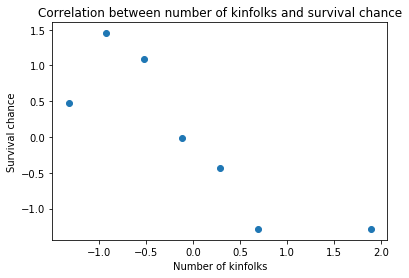

In [152]:
import matplotlib.pyplot as plt
%pylab inline
def calculate_corr(std_data1, std_data2):
    return (std_data1 * std_data2).mean()
plt.scatter(standard_data['NumF'], standard_data['SurChance'],)
plt.title('Correlation between number of kinfolks and survival chance')
plt.xlabel('Number of kinfolks')
plt.ylabel('Survival chance')
corr = calculate_corr(standard_data['NumF'], standard_data['SurChance'])
print ''
print 'the Pearson correlation is: ', corr